# Fitting Fourier Series with symfit

In [90]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    f = 1/(2*np.pi)
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

In [91]:
# Choose order of Fourier series.
FOURIER_ORDER = 5

# Define symbolic model with inputs x and targets y.
x, y = variables('x, y')
# Define model parameters w.
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=FOURIER_ORDER)}
print(model_dict)

{y: a0 + a1*cos(0.159154943091895*x) + a2*cos(0.318309886183791*x) + a3*cos(0.477464829275686*x) + a4*cos(0.636619772367581*x) + a5*cos(0.795774715459477*x) + b1*sin(0.159154943091895*x) + b2*sin(0.318309886183791*x) + b3*sin(0.477464829275686*x) + b4*sin(0.636619772367581*x) + b5*sin(0.795774715459477*x)}


In [92]:
# Make step function data
xdata = np.concatenate([np.random.uniform(-np.pi, 3*np.pi, 100), np.random.uniform(4*np.pi, 5*np.pi, 100)])

ydata = (np.sin(xdata) + np.random.normal(0,0.5,len(xdata)))*(xdata-np.min(xdata))/((np.max(xdata)-np.min(xdata)))

# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)


Parameter Value        Standard Deviation
a0        5.905788e+01 6.161772e+01
a1        -6.686215e+01 5.949221e+01
a2        -1.576689e+01 3.135023e+01
a3        3.814019e+01 3.686538e+01
a4        -1.633571e+01 9.146451e+00
a5        1.709413e+00 1.069496e+00
b1        -8.249766e+01 9.132729e+01
b2        7.488572e+01 6.767306e+01
b3        -1.989334e+01 9.630840e+00
b4        -6.557643e+00 9.778521e+00
b5        3.927177e+00 2.302557e+00
Status message         Optimization terminated successfully.
Number of iterations   52
Objective              <symfit.core.objectives.LeastSquares object at 0x7f7df9bff5c0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7f7df9bff0b8>

Goodness of fit qualifiers:
chi_squared            26.565974533851474
objective_value        13.282987266925737
r_squared              0.5448893012020108


In [93]:
# Get input values over entire domain.
input_data = np.linspace(-np.pi, 5*np.pi, 200)

# Now plot the fitted Fourier series over input_data.
fitted_fourier = fit.model(x=input_data, **fit_result.params).y

# Compare to true values over entire domain (without noise).
ytrue = (np.sin(input_data))*(input_data-np.min(xdata))/((np.max(xdata)-np.min(xdata)))

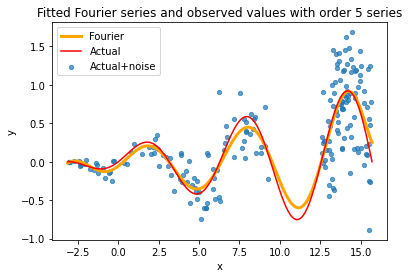

In [94]:
# Plot the result
plt.scatter(xdata, ydata, label="Actual+noise", s = 18, alpha=0.7)
#plt.scatter(xdata, fit.model(x=xdata, **fit_result.params).y, ls=':', label="Fourier")
plt.plot(input_data, fitted_fourier, label="Fourier", color='orange', linewidth=3)
plt.plot(input_data, ytrue, label="Actual", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Fitted Fourier series and observed values with order {} series".format(FOURIER_ORDER))
plt.show()